In [1]:
# Importing Libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset..
df_comp_data=pd.read_csv('Company Stock and Investment.csv',parse_dates=['Date'])
df_comp_data.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [3]:
# Displaying few rows...
df_comp_data.tail()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1979,2017-09-11,0.005984,0.000623,-0.002043,-0.003310
1980,2017-10-11,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793
1983,2017-11-15,-0.007006,0.005963,-0.013190,-0.008928


In [4]:
# chechking the features,duplicate values and nan values in the Datasets

print("\nFeatures/Columns : \n", df_comp_data.columns)
print("\n\nNumber of Features/Columns : ", len(df_comp_data.columns))
print("\nNumber of Rows : ",len(df_comp_data))
print("\n\nData Types :\n", df_comp_data.dtypes)
print("sum of duplicated values{}\n".format(df_comp_data.duplicated().sum()))
print("\nContains NaN/Empty cells : ", df_comp_data.isnull().values.any())
print("\nTotal empty cells by column :\n", df_comp_data.isnull().sum(),"\n\n")


Features/Columns : 
 Index(['Date', 'Oil Investments', 'Gold Investments', 'Comp Stock',
       'Other sharesInvestments'],
      dtype='object')


Number of Features/Columns :  5

Number of Rows :  1984


Data Types :
 Date                       datetime64[ns]
Oil Investments                   float64
Gold Investments                  float64
Comp Stock                        float64
Other sharesInvestments           float64
dtype: object
sum of duplicated values0


Contains NaN/Empty cells :  False

Total empty cells by column :
 Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64 




In [5]:
# Making a DataFrame consisting of 'Date' as index and only Oil investments data as a single feature...
df_oil_investment=pd.DataFrame({'Date':df_comp_data['Date'],'Oil Investment':df_comp_data['Oil Investments']},)
df_oil_investment.set_index('Date',inplace=True)
df_oil_investment

,Oil Investment
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256
...,...
2017-09-11,0.005984
2017-10-11,-0.007173
2017-11-13,0.000352


In [6]:
# Getting Stastistical information...
df_oil_investment.describe()

,Oil Investment
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


## Step 2: Visualize the Data

Text(0.5, 1.0, 'Oil Investments Per Year ')

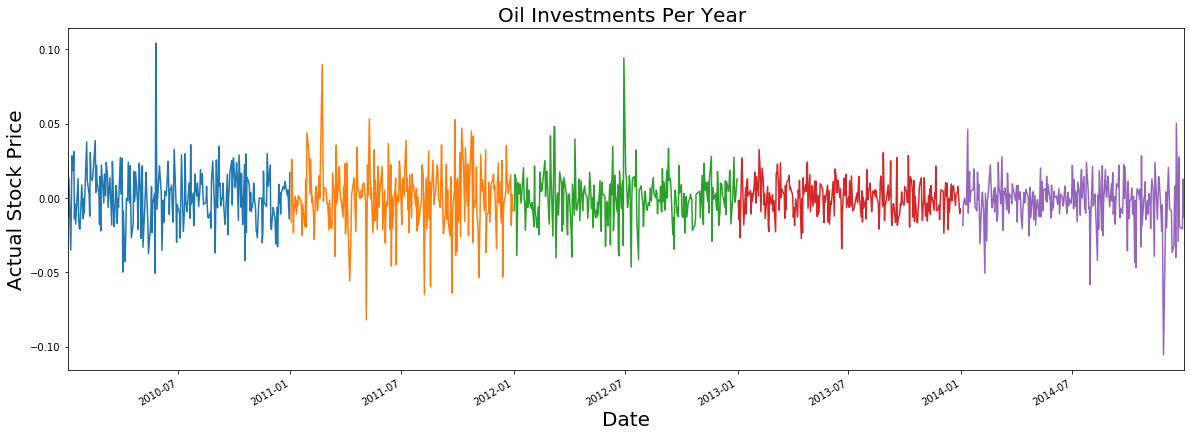

In [7]:
# Plotting graphs for different year to get better knowledge of the seasonality of the data(for year 2010 -2014)...
plt.subplots(figsize=(20,7))
df_oil_investment.loc['2010', 'Oil Investment'].plot()
df_oil_investment.loc['2011', 'Oil Investment'].plot()
df_oil_investment.loc['2012', 'Oil Investment'].plot()
df_oil_investment.loc['2013', 'Oil Investment'].plot()
df_oil_investment.loc['2014', 'Oil Investment'].plot()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Actual Stock Price',fontsize=20)
plt.title("Oil Investments Per Year ",fontsize=20)

Text(0.5, 1.0, 'Oil Investments Per Year ')

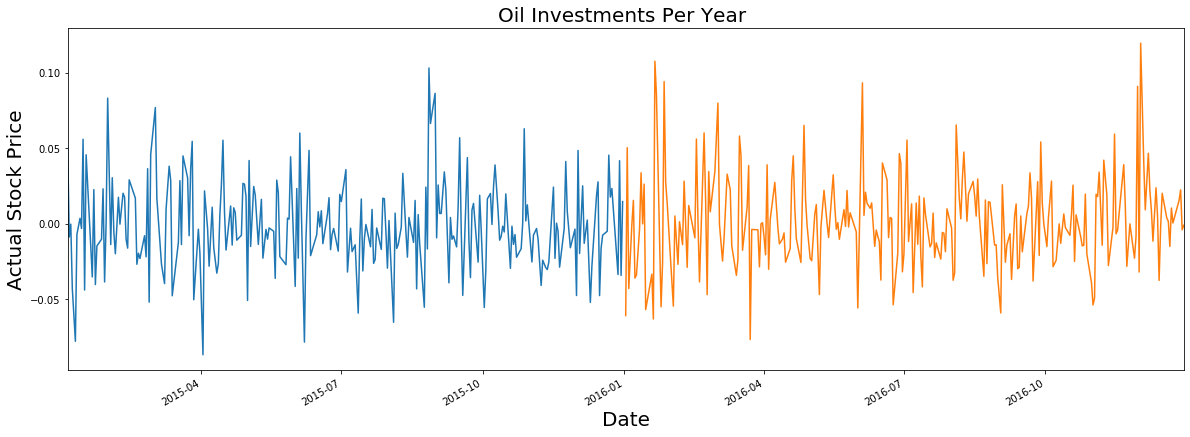

In [8]:
# Plotting graphs for different year to get better knowledge of the seasonality of the data(2015 -2016)...
plt.subplots(figsize=(20,7))
df_oil_investment.loc['2015', 'Oil Investment'].plot()
df_oil_investment.loc['2016', 'Oil Investment'].plot()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Actual Stock Price',fontsize=20)
plt.title("Oil Investments Per Year ",fontsize=20)

Text(0.5, 1.0, 'Oil Investments for 2017 Year ')

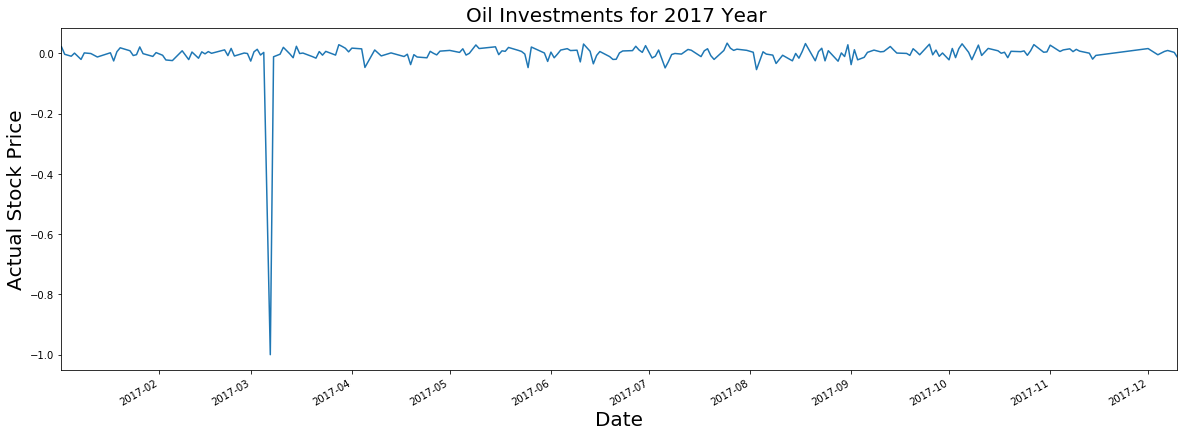

In [9]:
# Plotting data for year 2017..
plt.subplots(figsize=(20,7))
df_oil_investment.loc['2017', 'Oil Investment'].plot()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Actual Stock Price',fontsize=20)
plt.title("Oil Investments for 2017 Year ",fontsize=20)

### In above plot data looks like seasonal data. Now we will check if data is stationary or not

In [10]:
### Testing For Stationarity..

from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df_oil_investment['Oil Investment']) # adfuller give us 5 values

In [11]:
# showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-45.942162929839924, 0.0, 0, 1983, {'1%': -3.4336519592295947, '5%': -2.862998620943585, '10%': -2.567546508593341}, -8042.187722182893)


### Most important value is p-value above

In [12]:
#Ho: It is non stationary
#H1: It is stationary
### Testing For Stationarity

def adfuller_test(data):
    result=adfuller(data) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [13]:
# Printing adfuller Values..
adfuller_test(df_oil_investment['Oil Investment'])

ADF Test Statistic : -45.942162929839924
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


**As p value is less then .05 we are going to reject the null hypothesis-- Stationary**

Text(0.5, 1.0, 'Loess Smoothed 15% ')

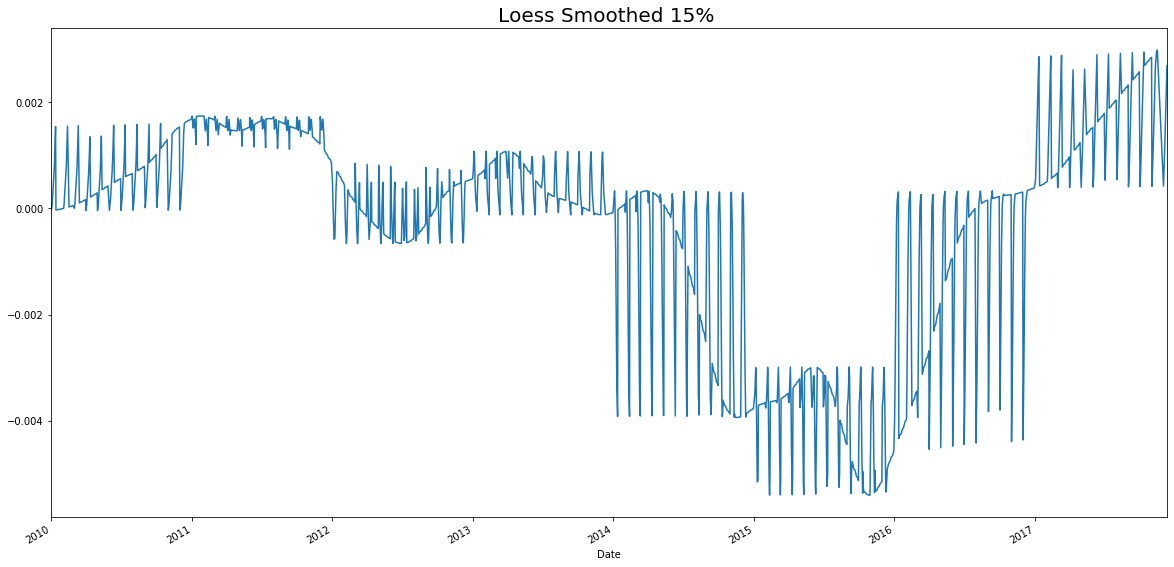

In [14]:
# Smooth graph for the oil investment data...
from statsmodels.nonparametric.smoothers_lowess import lowess
df_smooth_15 = pd.DataFrame(lowess(df_oil_investment['Oil Investment'], np.arange(len(df_oil_investment['Oil Investment'])), frac=0.15)[:, 1], index=df_oil_investment.index, columns=['Oil Investment'])
df_smooth_15['Oil Investment'].plot(figsize=(20,10))
plt.title("Loess Smoothed 15% ",fontsize=20)

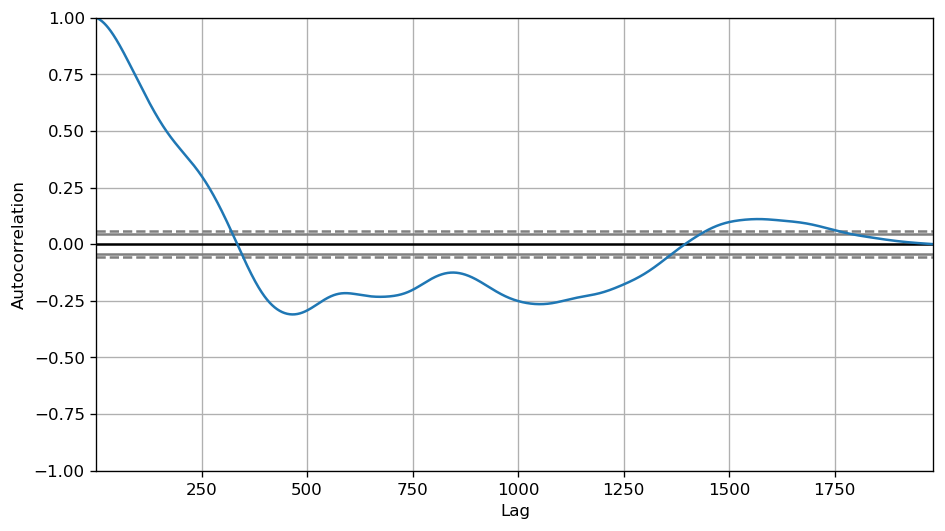

In [15]:
# plotting the correlation plot for the smooth data..
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df_smooth_15['Oil Investment'])

C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:409: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


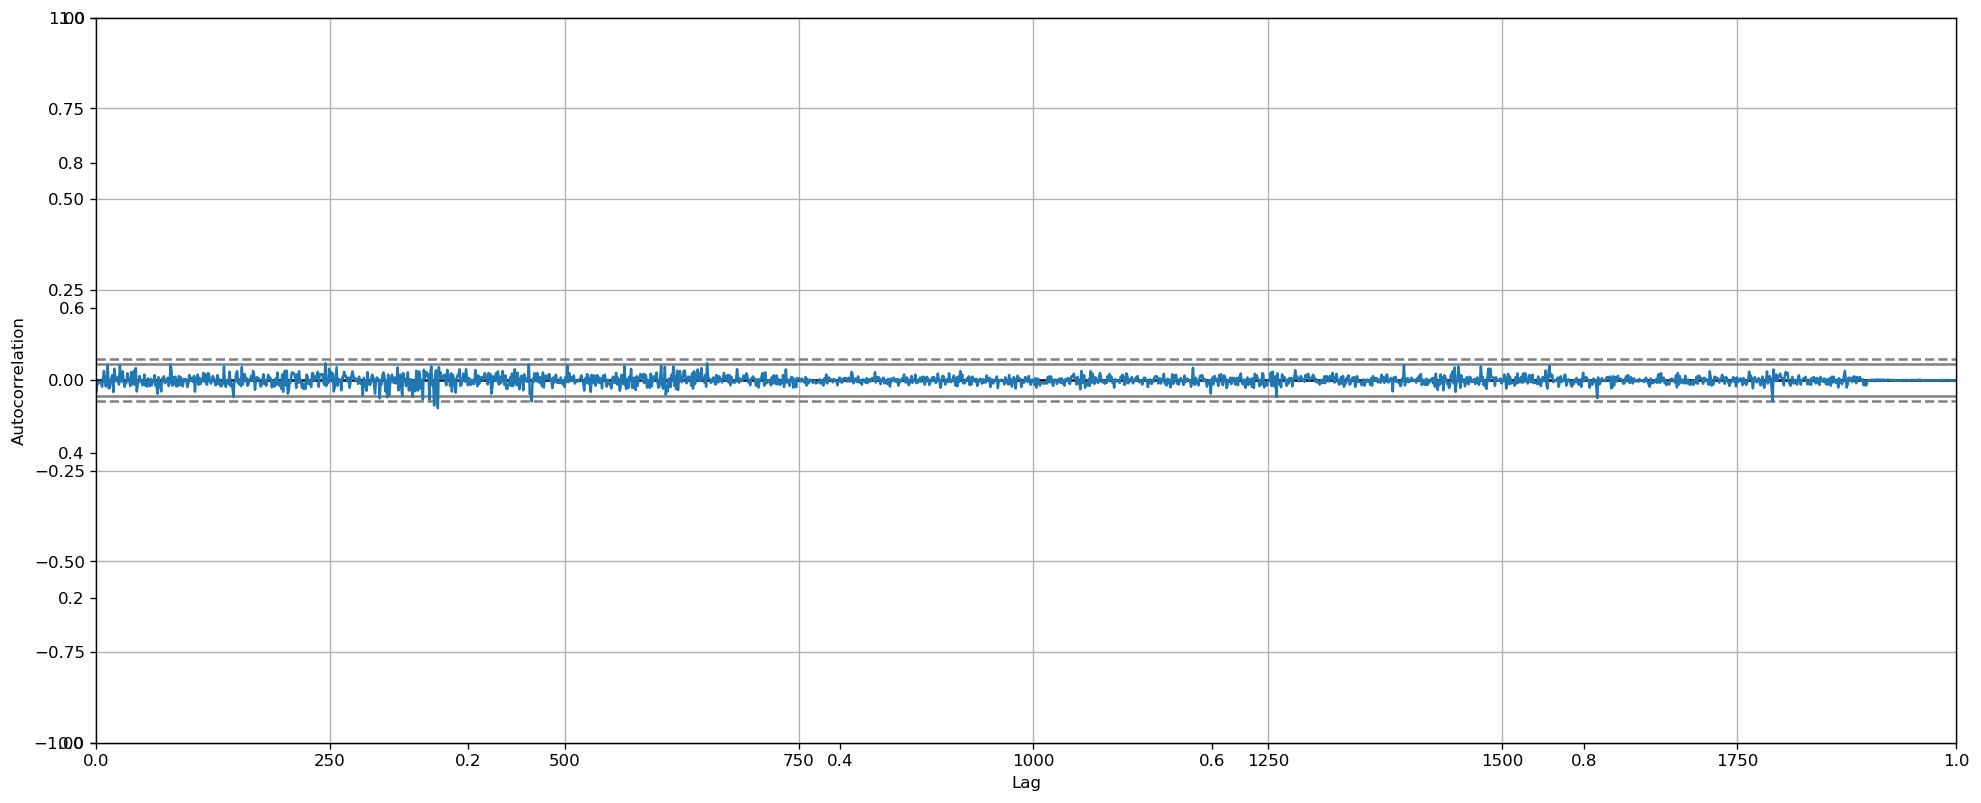

In [16]:
# plotting the correlation plot for the actual data..
from pandas.plotting import autocorrelation_plot
plt.subplots(figsize=(20,8))
autocorrelation_plot(df_oil_investment['Oil Investment'])
plt.show()

**In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:**

**1) p – The lag value where the PACF chart crosses the upper confidence interval for the first time.**              
**2) q – The lag value where the ACF chart crosses the upper confidence interval for the first time.**                         
      

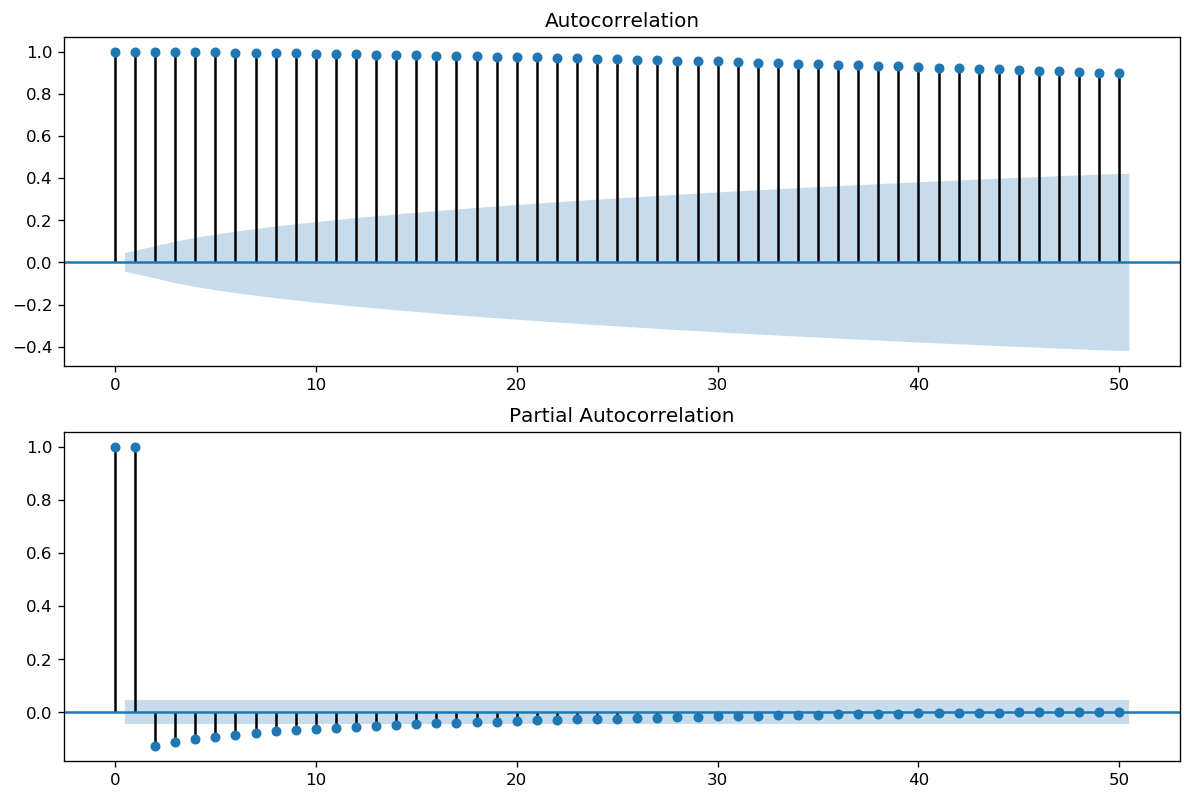

In [17]:
# Plotting autocorreltion plot partial autocorreltion plot for the smooth data
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df_smooth_15['Oil Investment'].iloc[1:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_smooth_15['Oil Investment'].iloc[1:],lags=50,ax=ax2)

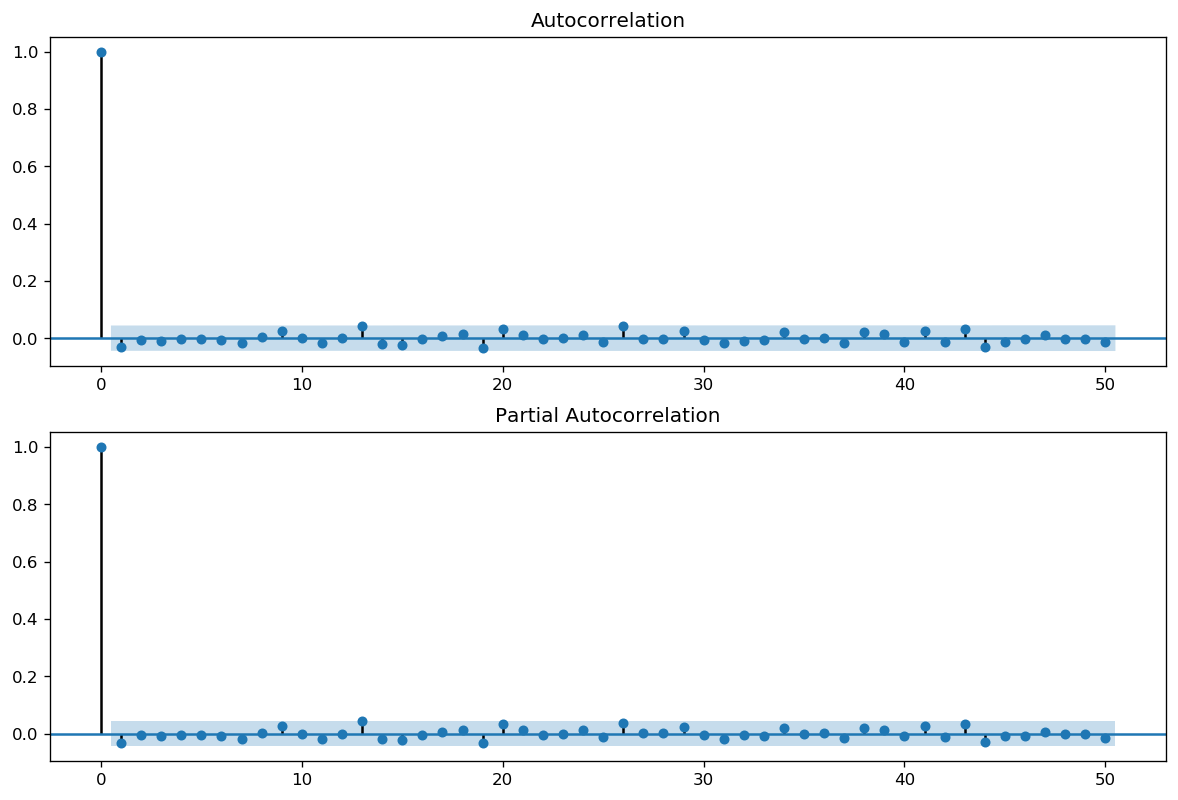

In [18]:
# Plotting autocorreltion plot partial autocorreltion plot  for the actual data..
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df_oil_investment['Oil Investment'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_oil_investment['Oil Investment'].iloc[13:],lags=50,ax=ax2)

**Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself.**    

**Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.**  

## Testing

In [19]:
# Create Training and validation sets of the actual data..
train = df_oil_investment['Oil Investment'][:1512]
validation=df_oil_investment['Oil Investment'][1513:1986]


### Plotting ACF and PACF graphs will get us p and q values and d=0 as the data is stationary but above ACF and PACf graphs are not giveing a clear picture thus using Auto-ARIMA.
### In Auto ARIMA, the model itself will generate the optimal p, d, and q values which would be suitable for the data set to provide better forecasting.

In [20]:
# using Auto arima to find the best model with best parameter value
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  # don't want to know if an order does not work
                         suppress_warnings=True, # don't want convergence warnings
                         stepwise=True) # set to stepwise


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=17.90 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-6453.217, Time=0.56 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-6905.542, Time=3.91 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=12.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-6455.216, Time=0.22 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-6464.867, Time=0.88 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-7086.597, Time=15.99 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=31.42 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=11.68 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-7085.549, Time=18.76 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-7086.394, Time=22.95 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=-7086.955, Time=18.56 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-6906.421, Time=7.25 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=37.91 sec
 ARIMA(1,0,1)(1,1,1)[12] i

In [21]:
# printing model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1512
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                3549.471
Date:                             Sun, 01 Nov 2020   AIC                          -7088.942
Time:                                     19:06:32   BIC                          -7062.376
Sample:                                          0   HQIC                         -7079.046
                                            - 1512                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5770      0.219     -2.630      0.009      -1.007      -0.147
ma.L1          0.5276      0.230      2.299      0.022       0.078       0.977
ar.S.L12      -0.6851      0.022    -31.601      0.000      -0.728      -0.643
ar.S.L24      -0.3431      0.021    -16.461      0.000      -0.384      -0.302
sigma2         0.0005   1.24e-05     41.229      0.000       0.000       0.001
===================================================================================
Ljung-Box (Q):                      190.89   Jarque-Bera (JB):               510.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting

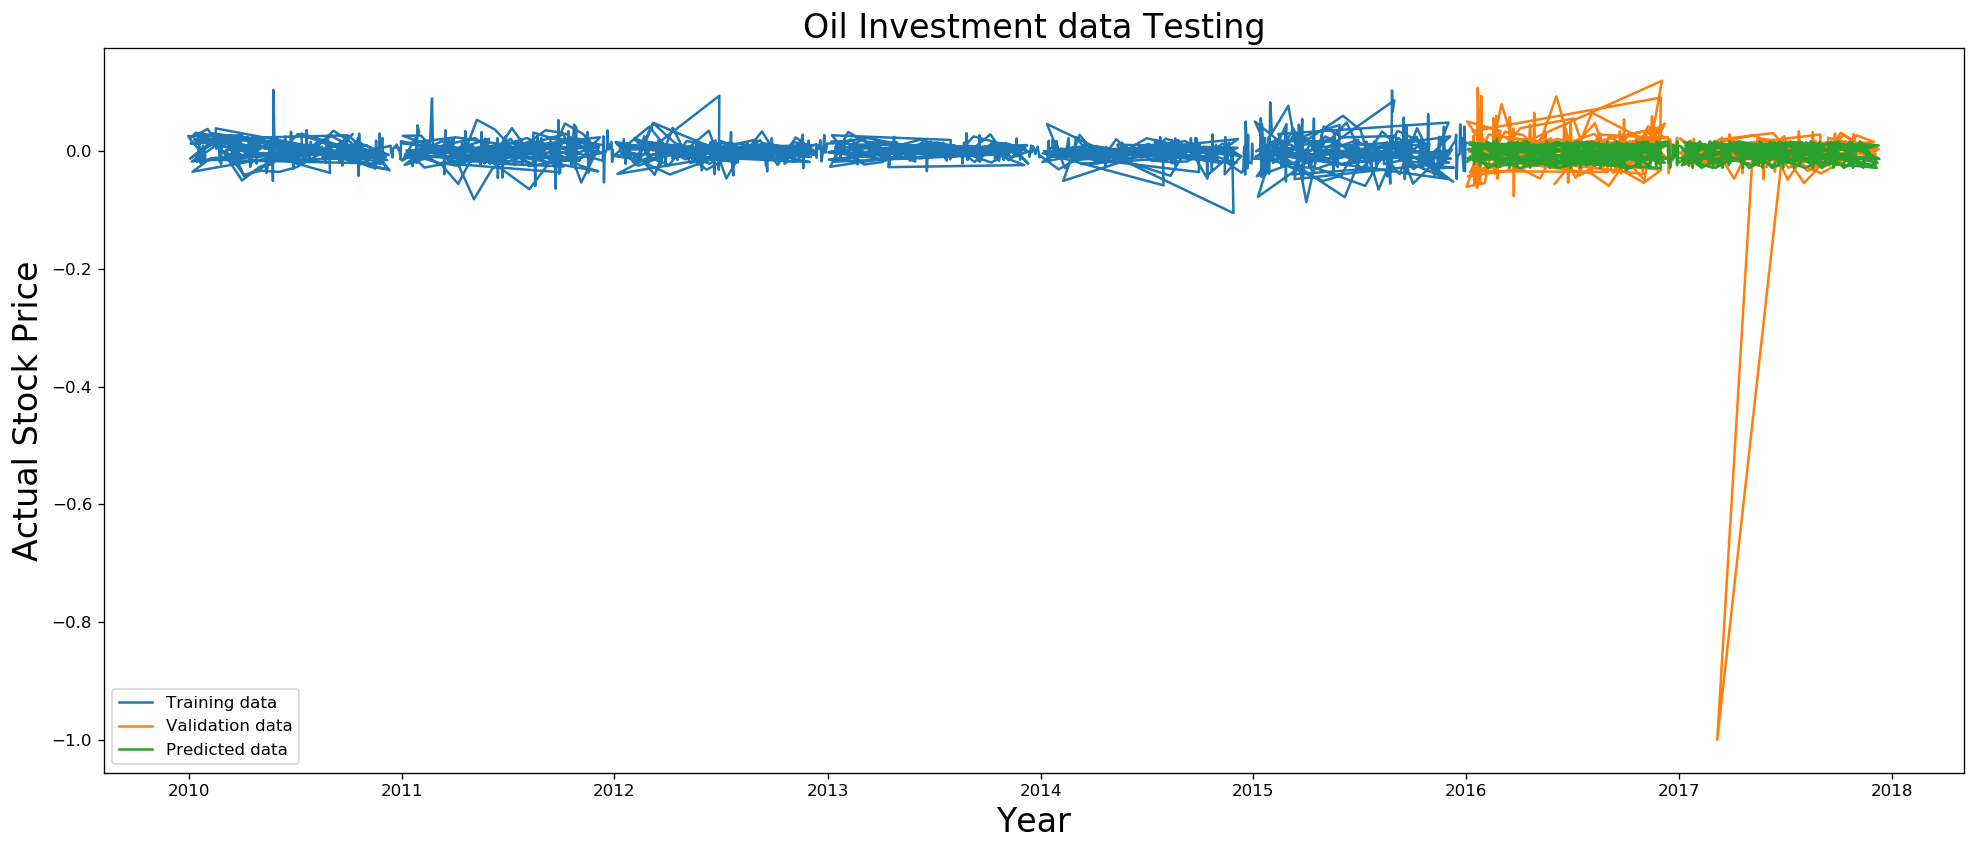

In [22]:
# Forecasting the model over validation data i.e 2017 and 2018

validated_data = model.predict(n_periods=len(validation))
validated_df = pd.DataFrame(validated_data,index = validation.index,columns=['Prediction'])

#plot the predictions for validation set
plt.subplots(figsize=(20,8))
plt.plot(train, label='Training data')
plt.plot(validation, label='Validation data')
plt.plot(validated_df, label='Predicted data')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Actual Stock Price',fontsize=20)
plt.legend(loc='lower left', fontsize=10)
plt.title("Oil Investment data Testing",fontsize=20)
plt.show()

In [23]:
# Displaying the predicted data
validated_df

,Prediction
Date,
2016-06-01,-0.024176
2016-07-01,-0.014521
2016-08-01,-0.015828
2016-11-01,0.016298
2016-12-01,-0.002297
...,...
2017-09-11,0.014899
2017-10-11,0.002478
2017-11-13,-0.028523


In [24]:
# Saving the data in a dataframe
validated_df["Previous"]=df_oil_investment["Oil Investment"]

Text(0.5, 1.0, 'Previous and predicted values')

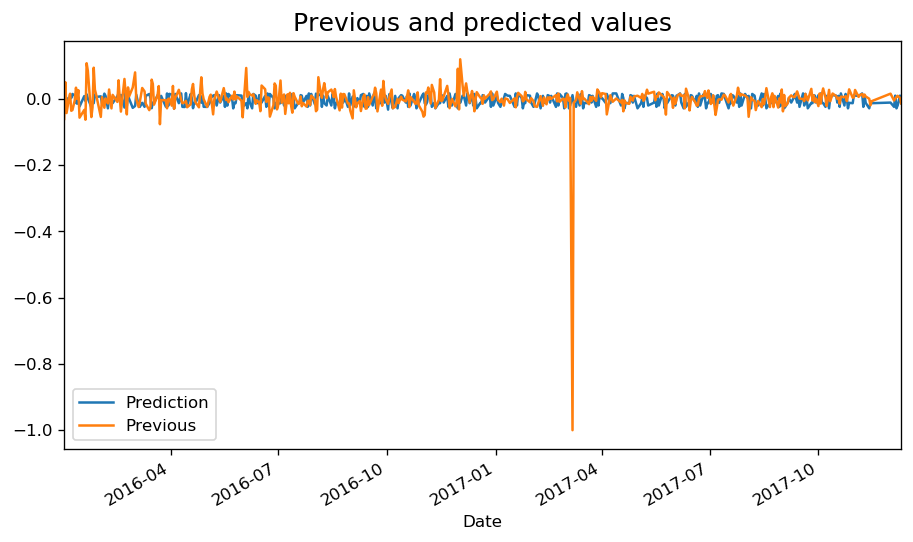

In [25]:
# Plotting Previous and predicted values...
validated_df.plot()
plt.title("Previous and predicted values",fontsize=15)

In [26]:
# Printing Errors..
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(validation, validated_data)
print('MSE(Mean Squarred Error): '+str(mse))
mae = mean_absolute_error(validation, validated_data)
print('MAE(Mean Absolute Error): '+str(mae))
rmse = np.sqrt(mean_squared_error(validation, validated_data))
print('RMSE(Root Mean Squared Error): '+str(rmse))

MSE(Mean Squarred Error): 0.003141619408849471
MAE(Mean Absolute Error): 0.026088202967783435
RMSE(Root Mean Squared Error): 0.056050150836991254


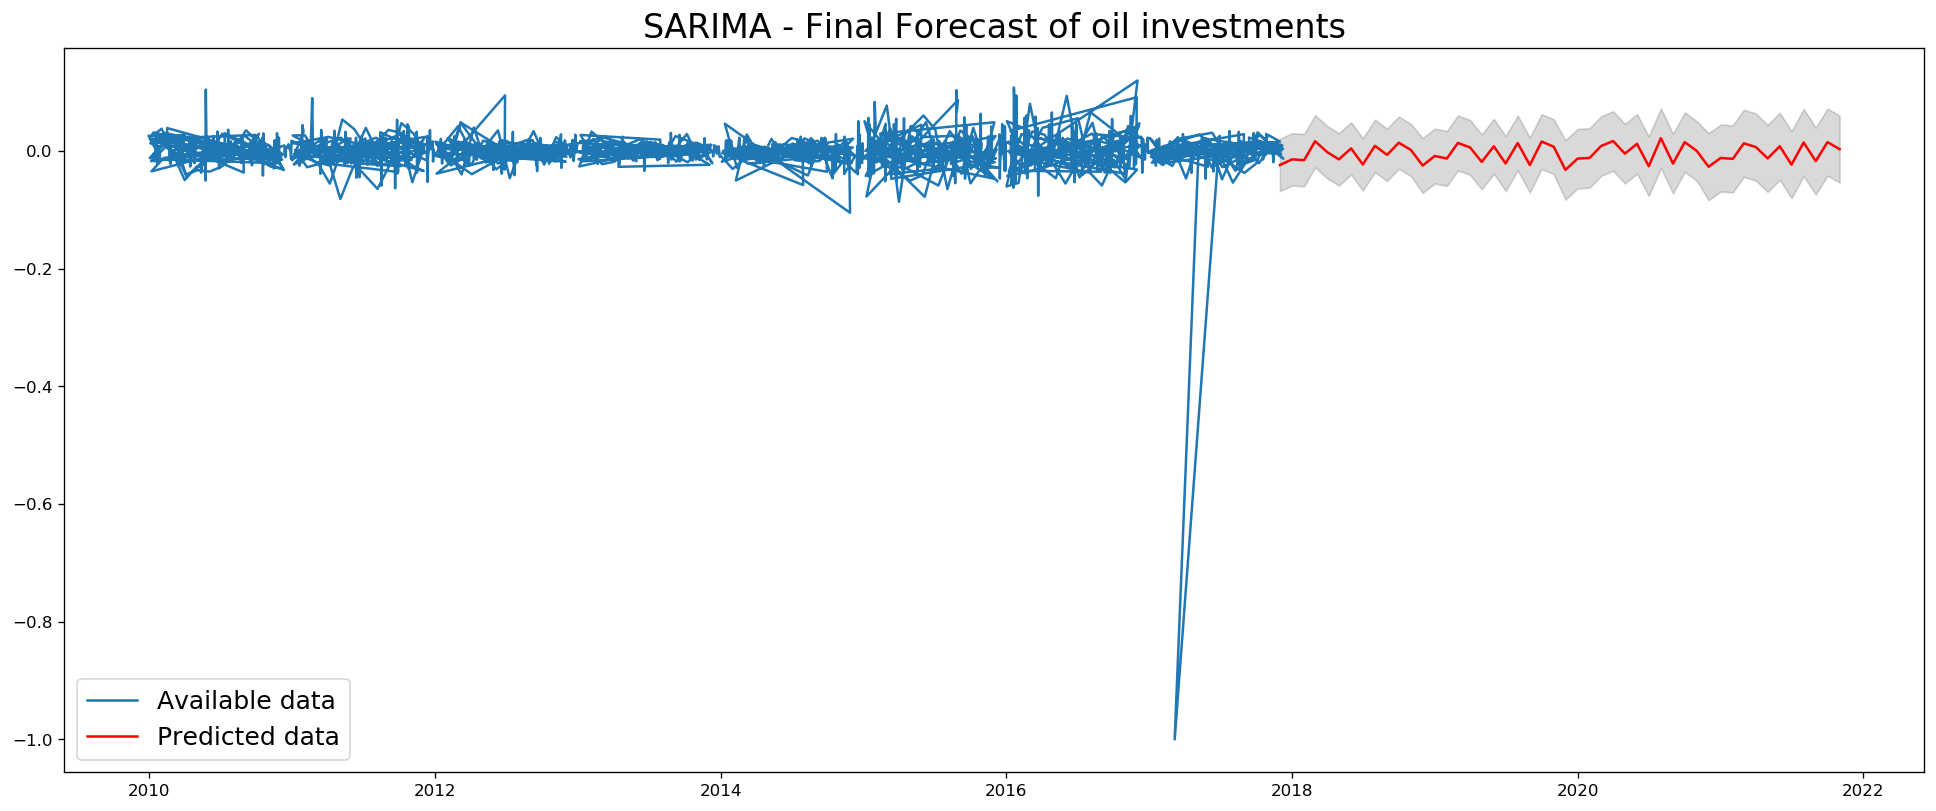

In [27]:
# Forecasting the model over the 2018 - 2021 year..
fitted, confint = model.predict(n_periods=48, return_conf_int=True)
index_of_fc = pd.date_range(validation.index[-1], periods = 48, freq='MS')

# make series for plotting purpose
forecast_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.subplots(figsize=(20,8))
plt.plot(df_oil_investment,label='Available data')
plt.plot(forecast_series, color='red',label='Predicted data')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.legend(loc='lower left', fontsize=15)
plt.title("SARIMA - Final Forecast of oil investments",fontsize=20)
plt.show()

In [28]:
# Displaying the forecasted data
forecast_series.head(10)

2017-12-01   -0.024176
2018-01-01   -0.014521
2018-02-01   -0.015828
2018-03-01    0.016298
2018-04-01   -0.002297
2018-05-01   -0.014554
2018-06-01    0.004116
2018-07-01   -0.023139
2018-08-01    0.008459
2018-09-01   -0.006912
Freq: MS, dtype: float64

In [29]:
# Creating a dataframe for the forecasted data
forecast_series_df = pd.DataFrame(forecast_series,columns=["Oil_Predictions"]) 
forecast_series_df.index.name="Date"
forecast_series_df.head(10)

,Oil_Predictions
Date,
2017-12-01,-0.024176
2018-01-01,-0.014521
2018-02-01,-0.015828
2018-03-01,0.016298
2018-04-01,-0.002297
2018-05-01,-0.014554
2018-06-01,0.004116
2018-07-01,-0.023139
2018-08-01,0.008459


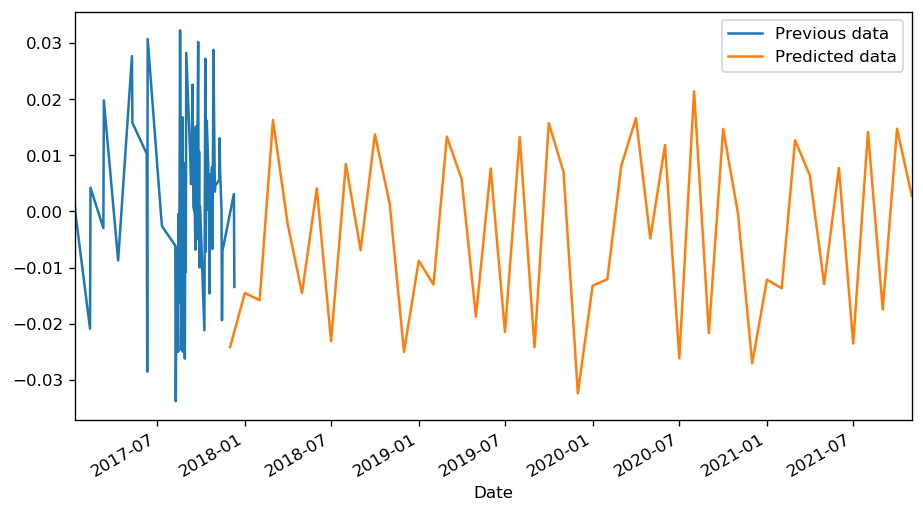

In [30]:
# Plotting the forecasted values..
validation[400:471].plot(label='Previous data')
forecast_series.plot(label='Predicted data')
plt.legend()

In [31]:
#Save the predicted values into a excel file
forecast_series_df.to_excel("Oil_Investments_Predictions.xlsx")

# Conclusion (According to the 2018-2021 forecast i.e 4 years):

>> 1) In 2011, 2012, 2015, 2016, the prices were high that was the time to sell the stocks.     
>> 2) In 2017 and 2018 were the years of least values So now the investors should hold the stocks for the oil.    
>> 3) Right now we can Invest in oil stocks as the prices are low right now and tends to increase in July-August month of each year.   
>> 4) Although the prices would increase between (Decemebr-January),(2018-2021) **but In July-August,2020 values were at peak, so that time would be best according to the model.**    
>> 5) In  november,2020 and september,2021 prices will increases, so that time would be best according to the model to sell.  
>> 6) december,2020 and august,2021 prices are less, so the best time periods to invest in the market according to the ,model. 


# End of the document